<a href="https://colab.research.google.com/github/RD2502/Blood-Bank-app/blob/main/CODE_COVID_19_TIME_SERIES_ANALYSIS_USING_ARIMA(B220043%2CB320058%2CB420059).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CONTRIBUTIONS:**
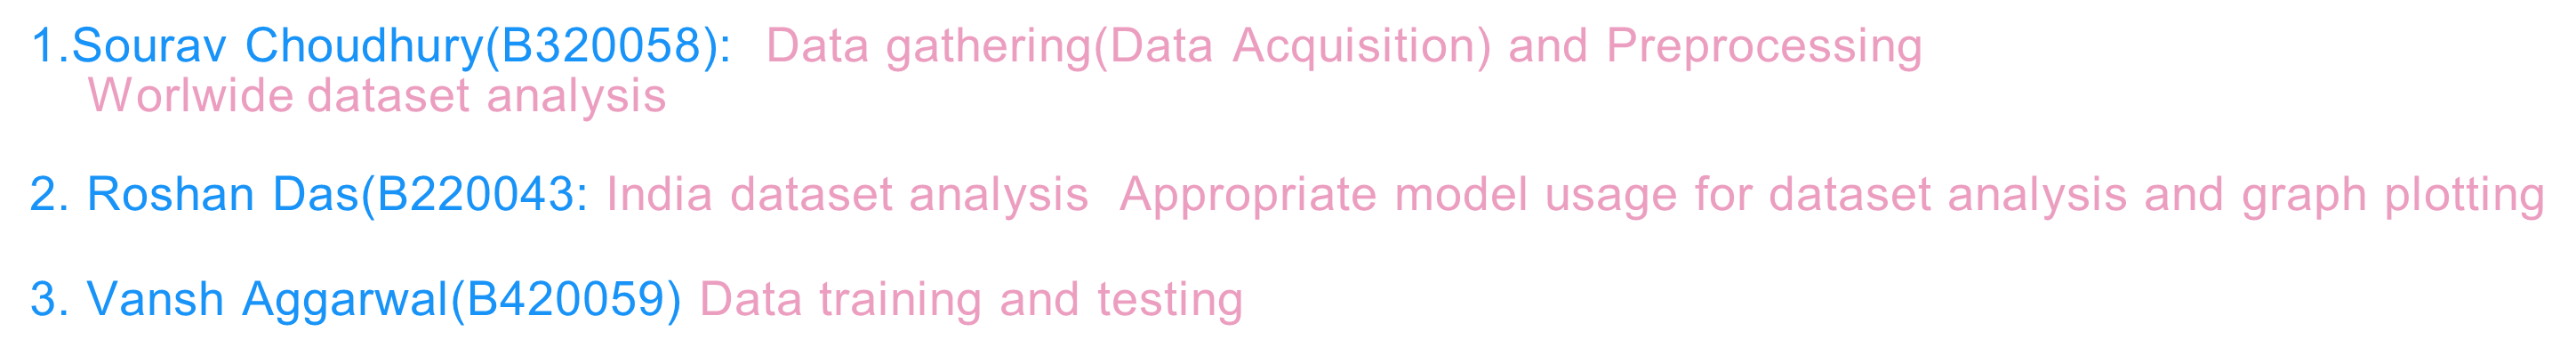

**COVID 19 TIME SERIES ANALYSIS USING ARIMA MODEL**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
def test_stationarity(timeseries):
  import matplotlib.pyplot as plt
  rolmean = timeseries.rolling(window=5).mean()
  rolstd = timeseries.rolling(window=5).std()

  orig = plt.plot(timeseries, label='Original')
  mean = plt.plot(rolmean, label='Rolling mean')
  std  = plt.plot(rolstd, label='Rolling std')

  plt.legend(loc='best')
  plt.title('Timeseries data with rolling mean and std. dev.')
  plt.show()

  from statsmodels.tsa.stattools import adfuller

  dftest = adfuller(timeseries)
  dfoutput = pd.Series(dftest[1], index = ['MacKinnon’s approximate p-value'])

  print(dfoutput)


**IMPORTING THE DATASET AND PREPROCESSING**

In [ ]:
file_location='/content/covid_19_data.csv'

import pandas as pd

covid_19_dataset = pd.read_csv(file_location)

covid_19_dataset.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [ ]:
covid_19_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              306429 non-null  int64  
 1   ObservationDate  306429 non-null  object 
 2   Province/State   228329 non-null  object 
 3   Country/Region   306429 non-null  object 
 4   Last Update      306429 non-null  object 
 5   Confirmed        306429 non-null  float64
 6   Deaths           306429 non-null  float64
 7   Recovered        306429 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 18.7+ MB


In [ ]:
covid_19_dataset.isnull().sum()

SNo                    0
ObservationDate        0
Province/State     78100
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64

In [ ]:
covid_19_dataset=covid_19_dataset.drop(['Province/State'],axis=1)

In [ ]:
covid_19_dataset['ObservationDate']=pd.to_datetime(covid_19_dataset['ObservationDate'], infer_datetime_format=True)

indexed_covid_19_dataset = covid_19_dataset.set_index(['ObservationDate'])

indexed_covid_19_dataset.head()

,SNo,Country/Region,Last Update,Confirmed,Deaths,Recovered
ObservationDate,,,,,,
2020-01-22,1,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
2020-01-22,2,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2020-01-22,3,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
2020-01-22,4,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
2020-01-22,5,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [ ]:
indexed_covid_19_dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 306429 entries, 2020-01-22 to 2021-05-29
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SNo             306429 non-null  int64  
 1   Country/Region  306429 non-null  object 
 2   Last Update     306429 non-null  object 
 3   Confirmed       306429 non-null  float64
 4   Deaths          306429 non-null  float64
 5   Recovered       306429 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 16.4+ MB


**DATEWISE ANALYSIS OF DATASET ALL AROUND THE GLOBE**

In [ ]:
datewise=indexed_covid_19_dataset.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})

In [ ]:
#Information regarding the covid cases
print("Confirmed cases all around the world",datewise["Confirmed"].iloc[-1])
print("Recovered case all around the world",datewise["Recovered"].iloc[-1])
print("Death cases all around the world",datewise["Deaths"].iloc[-1])
print("Active  cases all around the world",(datewise["Confirmed"].iloc[-1]-(datewise["Recovered"].iloc[-1]+datewise["Deaths"].iloc[-1])))
print("Closed cases around the world",(datewise["Recovered"].iloc[-1]+datewise["Deaths"].iloc[-1]))

Confirmed cases all around the world 169951560.0
Recovered case all around the world 107140669.0
Death cases all around the world 3533619.0
Active  cases all around the world 59277272.0
Closed cases around the world 110674288.0


In [ ]:
import seaborn as sns

**ACTIVE CASES**

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

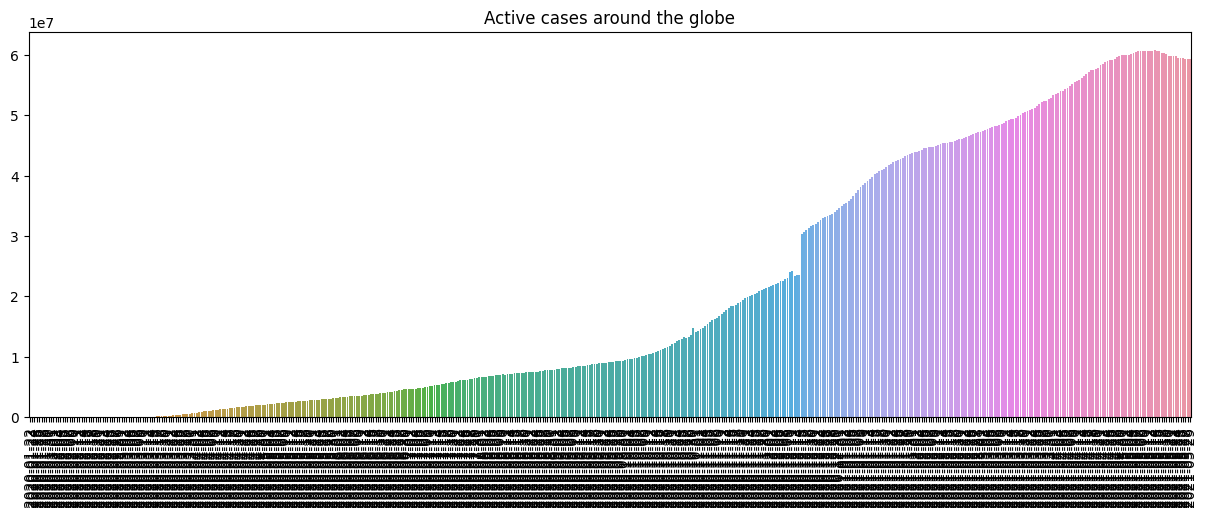

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
sns.barplot(x=datewise.index.date,y=datewise["Confirmed"]-(datewise["Recovered"]+datewise["Deaths"]))
plt.title("Active cases around the globe")
plt.xticks(rotation=90)

**RECOVERED CASES**

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

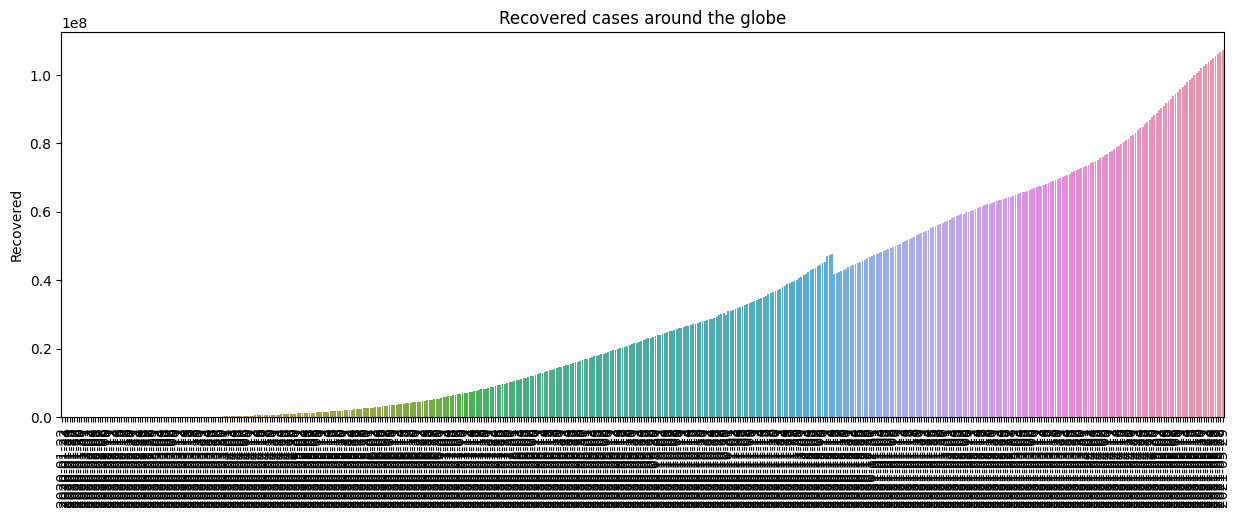

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x=datewise.index.date,y=datewise["Recovered"])
plt.title("Recovered cases around the globe")
plt.xticks(rotation=90)

**DEATH CASES**

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

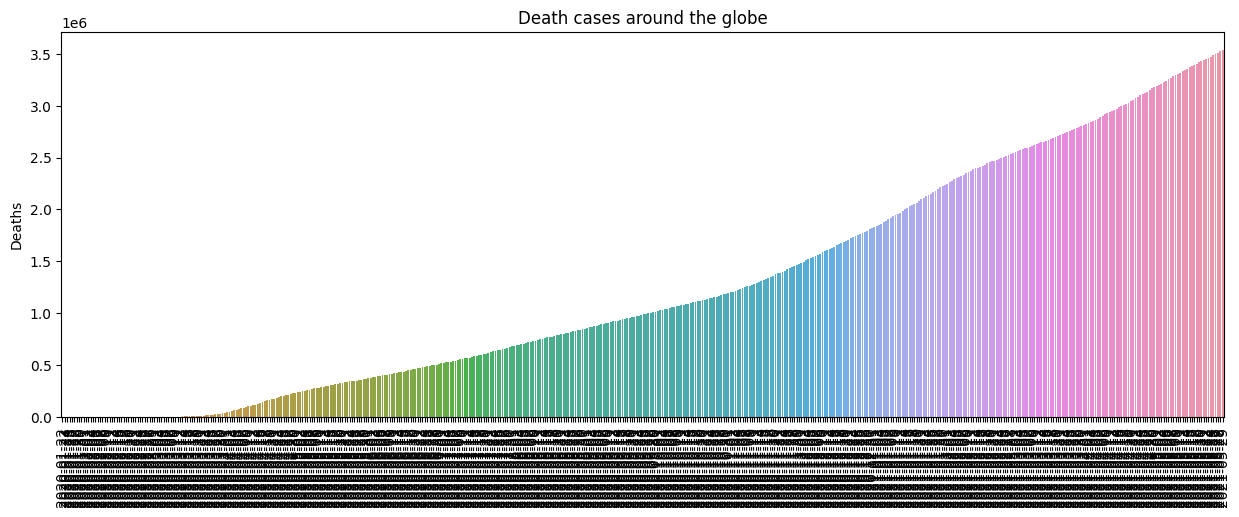

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x=datewise.index.date,y=datewise["Deaths"])
plt.title("Death cases around the globe")
plt.xticks(rotation=90)

**CLOSED CASES**

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

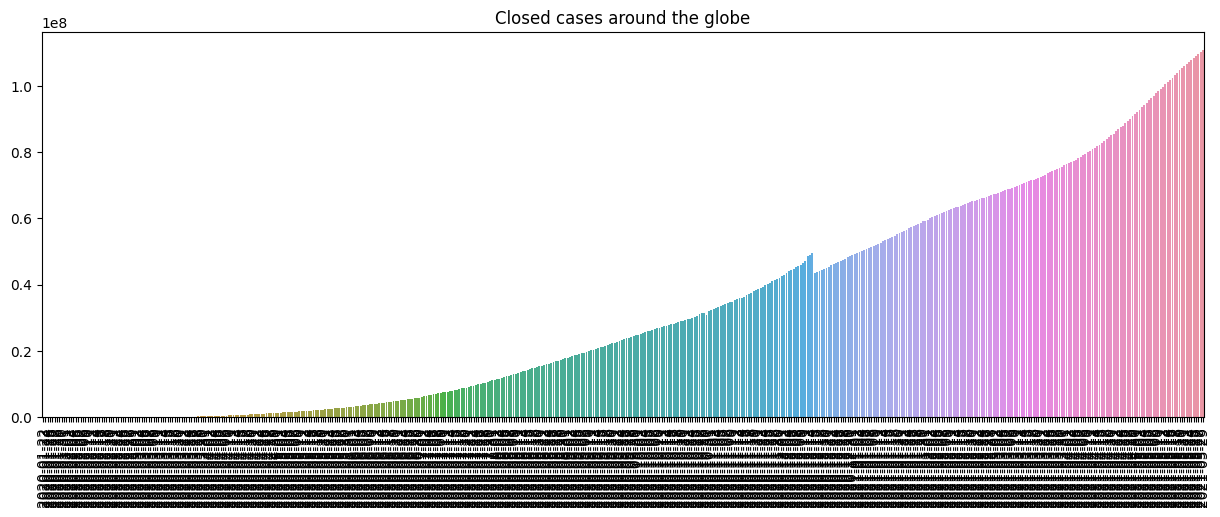

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x=datewise.index.date,y=(datewise["Recovered"]+datewise["Deaths"]))
plt.title("Closed cases around the globe")
plt.xticks(rotation=90)

**CONFIRMED CASES**

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

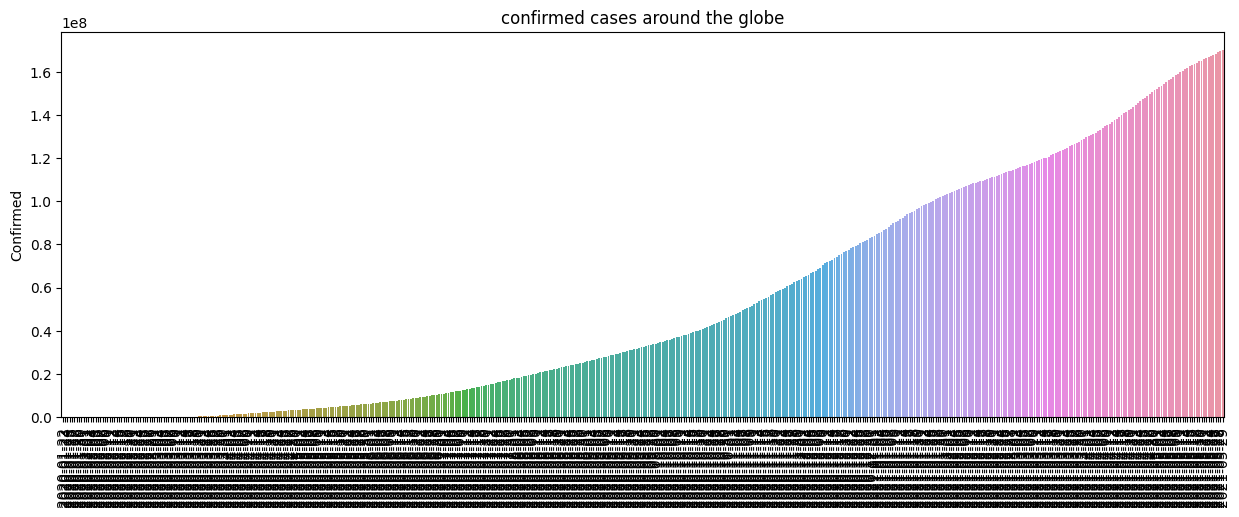

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x=datewise.index.date,y=datewise["Confirmed"])
plt.title("confirmed cases around the globe")
plt.xticks(rotation=90)

**WEEKLY ANALYSIS OF DATASET AROUND THE GLOBE**

Text(0.5, 1.0, 'Weekly progress of different types of cases')

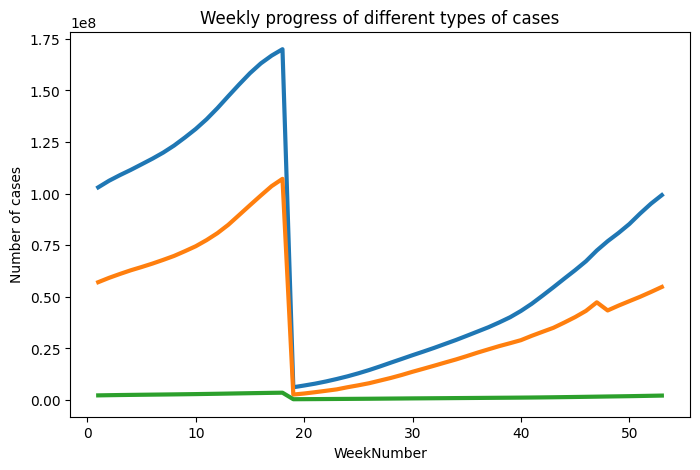

In [ ]:
datewise["WeekofYear"]=datewise.index.weekofyear
week_num=[]
weekwise_confirmed=[]
weekwise_recovered=[]
weekwise_deaths=[]
w=1
for i in list(datewise["WeekofYear"].unique()):
    weekwise_confirmed.append(datewise[datewise["WeekofYear"]==i]["Confirmed"].iloc[-1])
    weekwise_recovered.append(datewise[datewise["WeekofYear"]==i]["Recovered"].iloc[-1])
    weekwise_deaths.append(datewise[datewise["WeekofYear"]==i]["Deaths"].iloc[-1])
    week_num.append(w)
    w=w+1
plt.figure(figsize=(8,5))
plt.plot(week_num,weekwise_confirmed,linewidth=3)
plt.plot(week_num,weekwise_recovered,linewidth=3)
plt.plot(week_num,weekwise_deaths,linewidth=3)
plt.xlabel("WeekNumber")
plt.ylabel("Number of cases")
plt.title("Weekly progress of different types of cases")

**AVERAGE INCREASE IN NUMBER OF CASES**

Average increase in number of confirmed cases everyday: 344030.0
Average increase in number of recovered cases everyday: 216884.0
Average increase in number of death cases everyday: 7168.0


(array([18262., 18322., 18383., 18444., 18506., 18567., 18628., 18687.,
        18748.]),
 [Text(18262.0, 0, '2020-01'),
  Text(18322.0, 0, '2020-03'),
  Text(18383.0, 0, '2020-05'),
  Text(18444.0, 0, '2020-07'),
  Text(18506.0, 0, '2020-09'),
  Text(18567.0, 0, '2020-11'),
  Text(18628.0, 0, '2021-01'),
  Text(18687.0, 0, '2021-03'),
  Text(18748.0, 0, '2021-05')])

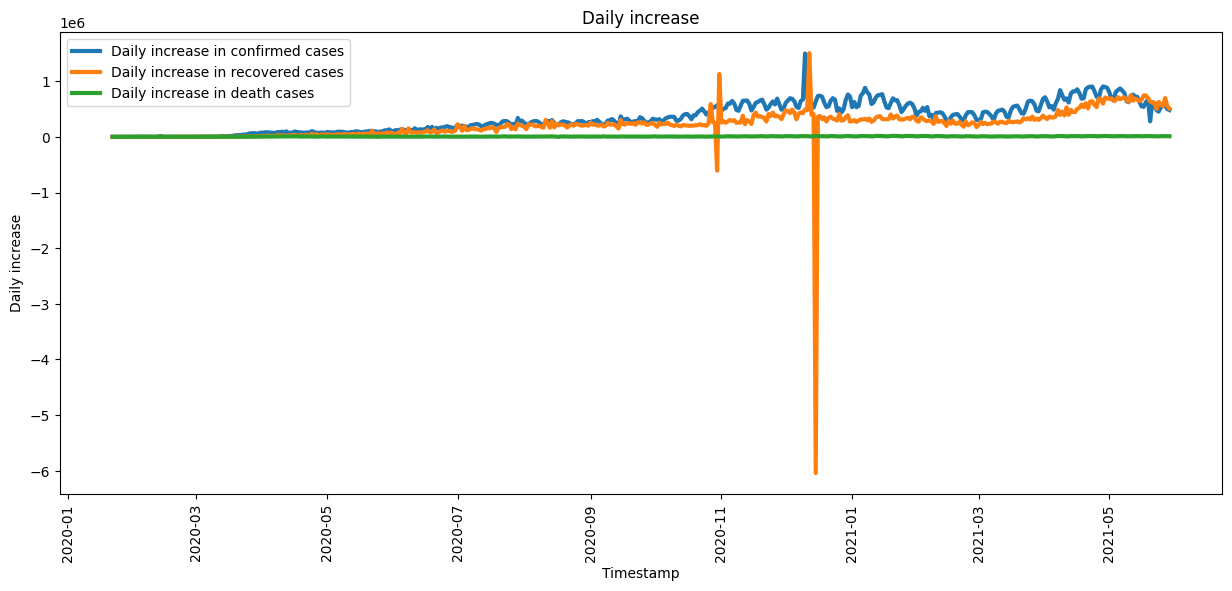

In [ ]:
import numpy as np
print("Average increase in number of confirmed cases everyday:",np.round(datewise["Confirmed"].diff().fillna(0).mean()))
print("Average increase in number of recovered cases everyday:",np.round(datewise["Recovered"].diff().fillna(0).mean()))
print("Average increase in number of death cases everyday:",np.round(datewise["Deaths"].diff().mean()))
plt.figure(figsize=(15,6))
plt.plot(np.round(datewise["Confirmed"].diff().fillna(0)),label="Daily increase in confirmed cases",linewidth=3)
plt.plot(np.round(datewise["Recovered"].diff().fillna(0)),label="Daily increase in recovered cases",linewidth=3)
plt.plot(np.round(datewise["Deaths"].diff().fillna(0)),label="Daily increase in death cases",linewidth=3)
plt.xlabel("Timestamp")
plt.ylabel("Daily increase")
plt.title("Daily increase")
plt.legend()
plt.xticks(rotation=90)

**DATASET ANALYSIS FOR INDIA**

In [ ]:
#Data analysis for India
indian_data=indexed_covid_19_dataset[indexed_covid_19_dataset["Country/Region"]=="India"]
datewise_india=indian_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
print("Confirmed cases in India",datewise_india["Confirmed"].iloc[-1])
print("Recovered cases in India",datewise_india["Recovered"].iloc[-1])
print("Death cases in India",datewise_india["Deaths"].iloc[-1])
print("Active  cases in India",(datewise_india["Confirmed"].iloc[-1]-(datewise_india["Recovered"].iloc[-1]+datewise_india["Deaths"].iloc[-1])))
print("Closed cases in India",(datewise_india["Recovered"].iloc[-1]+datewise_india["Deaths"].iloc[-1]))

Confirmed cases in India 27894800.0
Recovered cases in India 25454320.0
Death cases in India 325972.0
Active  cases in India 2114508.0
Closed cases in India 25780292.0


**ACTIVE CASES IN INDIA**

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

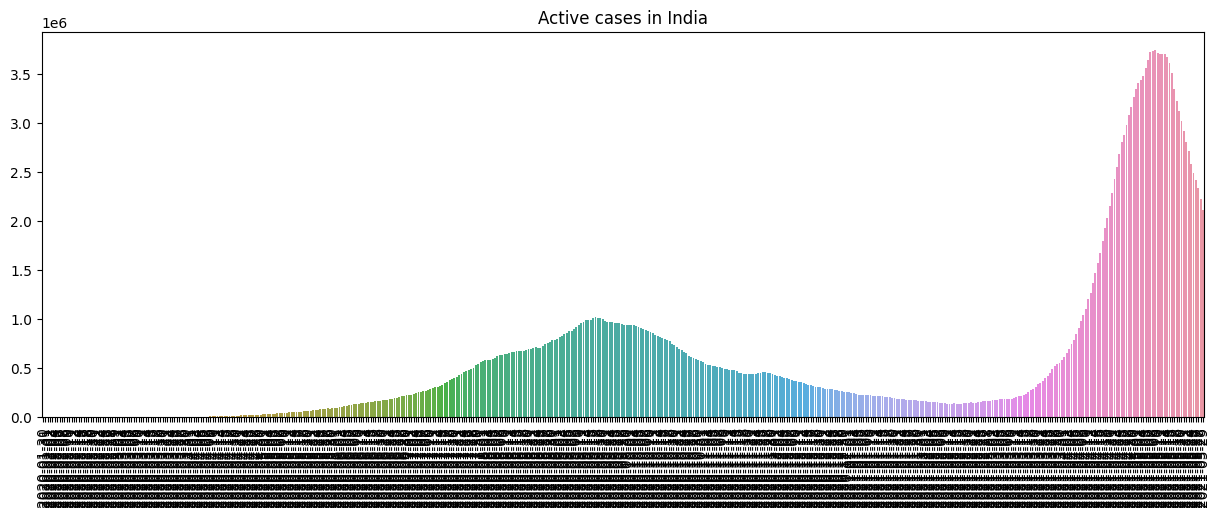

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x=datewise_india.index.date,y=datewise_india["Confirmed"]-(datewise_india["Recovered"]+datewise_india["Deaths"]))
plt.title("Active cases in India")
plt.xticks(rotation=90)

**RECOVERED CASES IN INDIA**

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

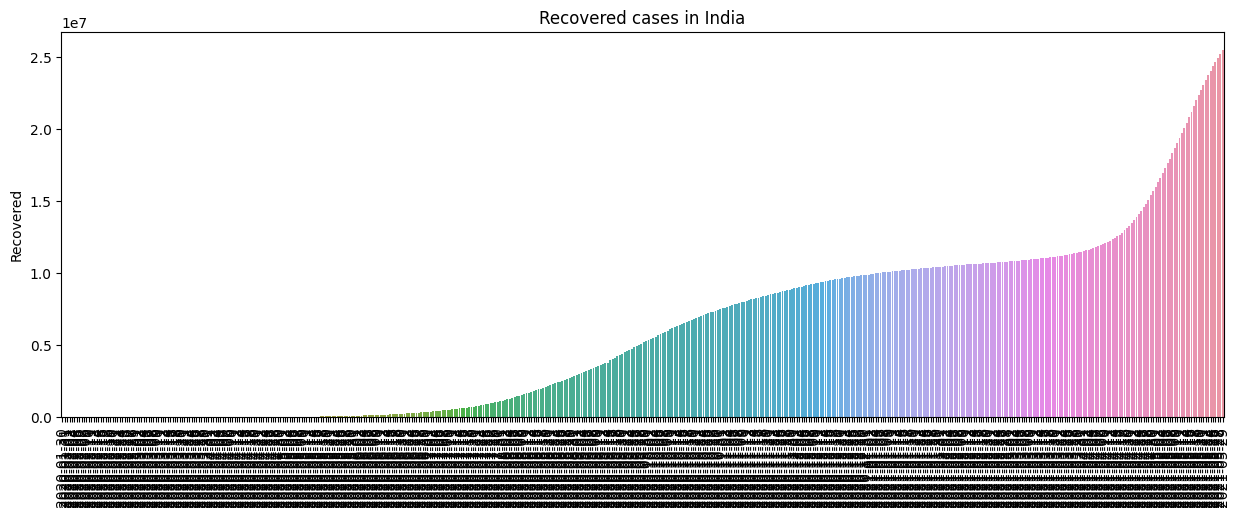

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x=datewise_india.index.date,y=datewise_india["Recovered"])
plt.title("Recovered cases in India")
plt.xticks(rotation=90)

**DEATH  CASES IN INDIA**

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

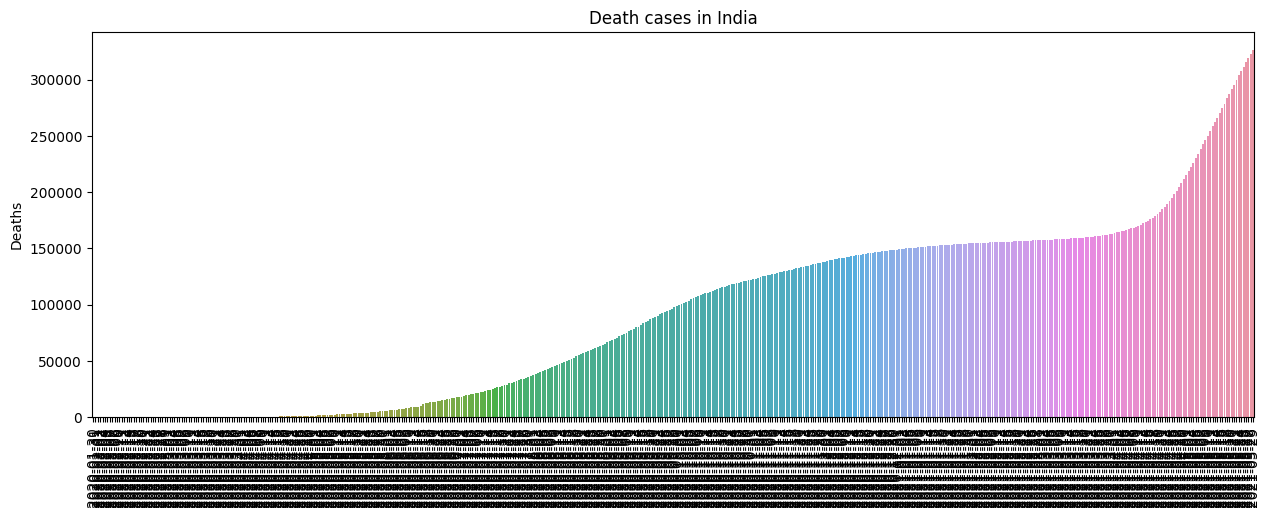

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x=datewise_india.index.date,y=datewise_india["Deaths"])
plt.title("Death cases in India")
plt.xticks(rotation=90)

**CLOSED CASES IN INDIA**

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

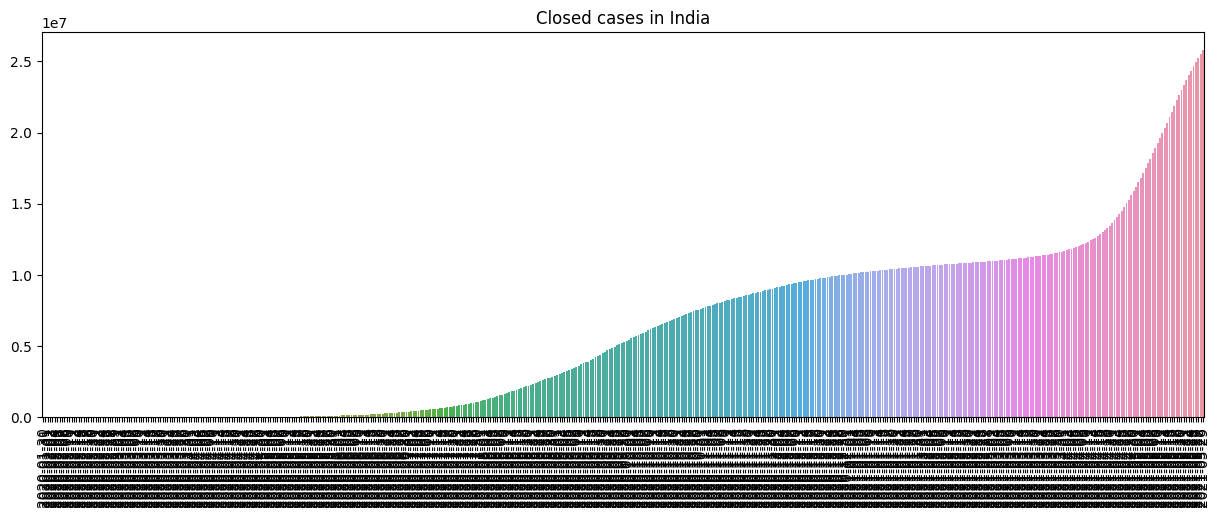

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x=datewise_india.index.date,y=(datewise_india["Recovered"]+datewise_india["Deaths"]))
plt.title("Closed cases in India")
plt.xticks(rotation=90)

**CONFIRMED CASES IN INDIA**

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

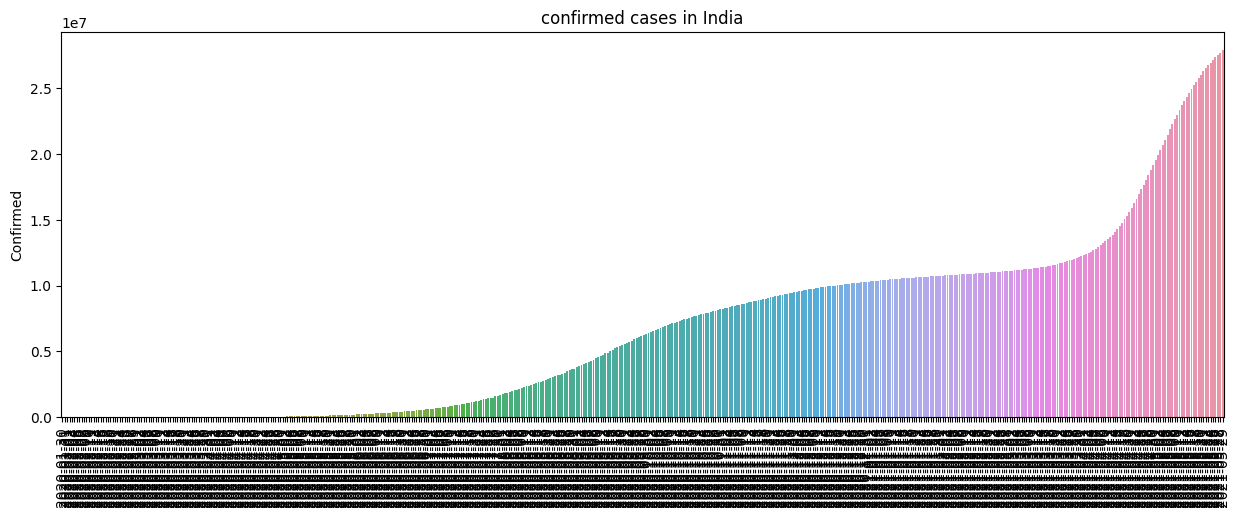

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x=datewise_india.index.date,y=datewise_india["Confirmed"])
plt.title("confirmed cases in India")
plt.xticks(rotation=90)

**WEEKLY ANALYSIS OF THE DATASET IN INDIA**

Text(0.5, 1.0, 'Weekly progress of different types of cases')

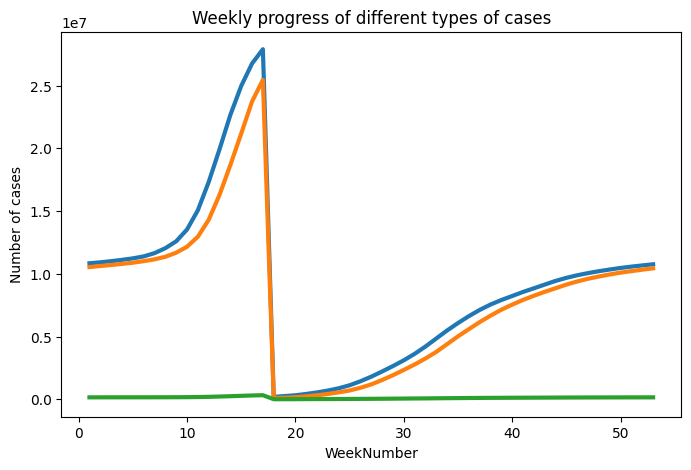

In [ ]:
datewise_india["WeekofYear"]=datewise_india.index.weekofyear
week_num=[]
weekwise_confirmed=[]
weekwise_recovered=[]
weekwise_deaths=[]
w=1
for i in list(datewise_india["WeekofYear"].unique()):
    weekwise_confirmed.append(datewise_india[datewise_india["WeekofYear"]==i]["Confirmed"].iloc[-1])
    weekwise_recovered.append(datewise_india[datewise_india["WeekofYear"]==i]["Recovered"].iloc[-1])
    weekwise_deaths.append(datewise_india[datewise_india["WeekofYear"]==i]["Deaths"].iloc[-1])
    week_num.append(w)
    w=w+1
plt.figure(figsize=(8,5))
plt.plot(week_num,weekwise_confirmed,linewidth=3)
plt.plot(week_num,weekwise_recovered,linewidth=3)
plt.plot(week_num,weekwise_deaths,linewidth=3)
plt.xlabel("WeekNumber")
plt.ylabel("Number of cases")
plt.title("Weekly progress of different types of cases")

**AVERAGE INCREASE IN NUMBER OF CASES**

Average increase in number of confirmed cases everyday: 57397.0
Average increase in number of recovered cases everyday: 52375.0
Average increase in number of death cases everyday: 672.0


(array([18322., 18383., 18444., 18506., 18567., 18628., 18687., 18748.]),
 [Text(18322.0, 0, '2020-03'),
  Text(18383.0, 0, '2020-05'),
  Text(18444.0, 0, '2020-07'),
  Text(18506.0, 0, '2020-09'),
  Text(18567.0, 0, '2020-11'),
  Text(18628.0, 0, '2021-01'),
  Text(18687.0, 0, '2021-03'),
  Text(18748.0, 0, '2021-05')])

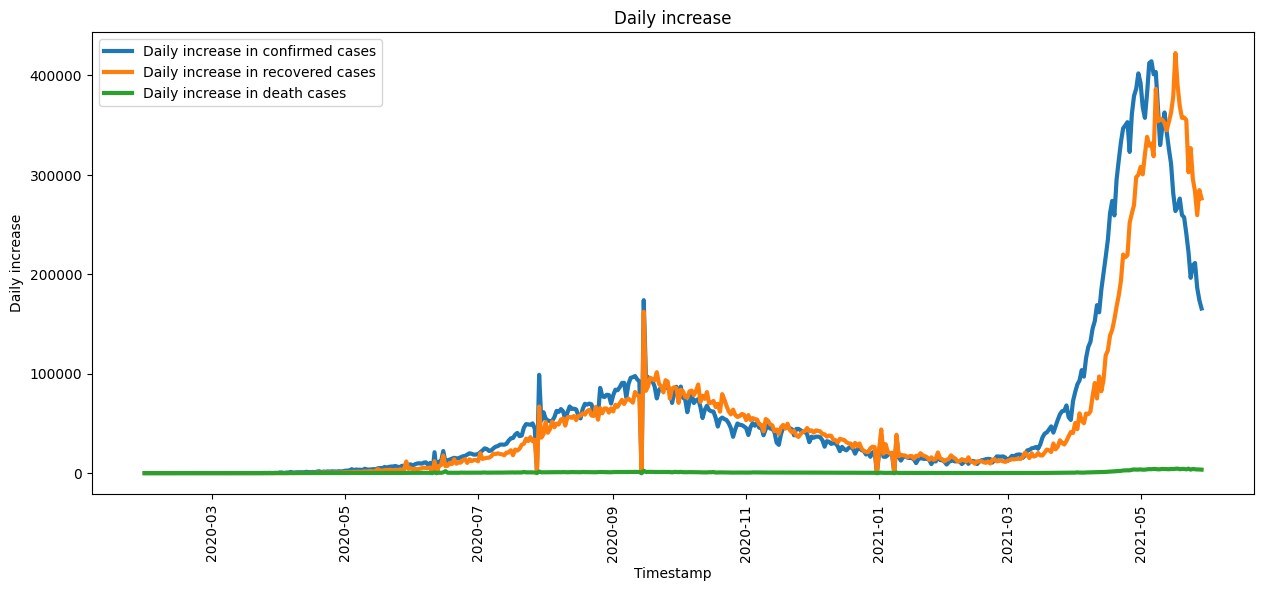

In [ ]:
print("Average increase in number of confirmed cases everyday:",np.round(datewise_india["Confirmed"].diff().fillna(0).mean()))
print("Average increase in number of recovered cases everyday:",np.round(datewise_india["Recovered"].diff().fillna(0).mean()))
print("Average increase in number of death cases everyday:",np.round(datewise_india["Deaths"].diff().mean()))
plt.figure(figsize=(15,6))
plt.plot(np.round(datewise_india["Confirmed"].diff().fillna(0)),label="Daily increase in confirmed cases",linewidth=3)
plt.plot(np.round(datewise_india["Recovered"].diff().fillna(0)),label="Daily increase in recovered cases",linewidth=3)
plt.plot(np.round(datewise_india["Deaths"].diff().fillna(0)),label="Daily increase in death cases",linewidth=3)
plt.xlabel("Timestamp")
plt.ylabel("Daily increase")
plt.title("Daily increase")
plt.legend()
plt.xticks(rotation=90)

**MODEL BUILDING ,TRAINING , TESTING USING ARIMA FOR CONFIRMED CASES IN INDIA **

In [ ]:
covid_19_dataset['ObservationDate']=pd.to_datetime(covid_19_dataset['ObservationDate'], infer_datetime_format=True)
indexed_covid_19_dataset = covid_19_dataset.set_index(['ObservationDate'])
indexed_covid_19_dataset.head()

,SNo,Country/Region,Last Update,Confirmed,Deaths,Recovered
ObservationDate,,,,,,
2020-01-22,1,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
2020-01-22,2,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2020-01-22,3,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
2020-01-22,4,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
2020-01-22,5,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [ ]:
covid_data_india = indexed_covid_19_dataset['Country/Region'] == 'India'
covid_india_dataset = indexed_covid_19_dataset[covid_data_india]
confirmed_case = covid_india_dataset['Confirmed']
covid_india_confirmed_agg_dataset = confirmed_case.groupby(['ObservationDate']).sum()


**STATIONARITY CHECK FOR DATASET**

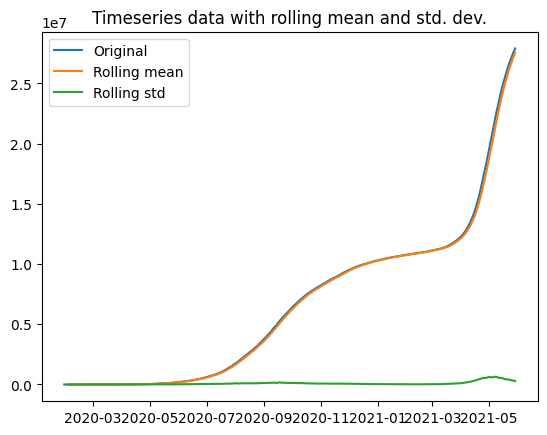

MacKinnon’s approximate p-value    0.998332
dtype: float64


In [ ]:
test_stationarity(covid_india_confirmed_agg_dataset)

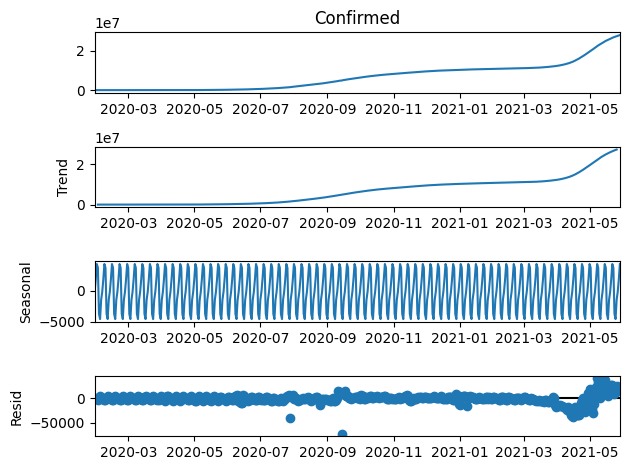

In [ ]:
import statsmodels.api as sm
decomposition=sm.tsa.seasonal_decompose(covid_india_confirmed_agg_dataset,model="additive")
fig=decomposition.plot()
plt.show()

In [ ]:
import numpy as np

**REMOVAL OF TREND COMPONENT**

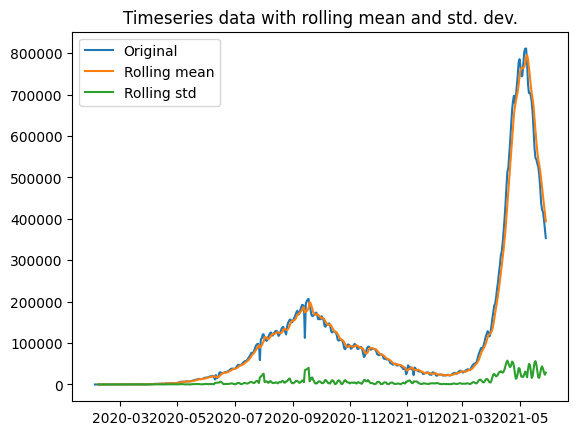

MacKinnon’s approximate p-value    0.013511
dtype: float64


In [ ]:
ma = covid_india_confirmed_agg_dataset.rolling(window=5).mean()
covid_india_confirmed_agg_dataset_minus_ma=covid_india_confirmed_agg_dataset - ma
covid_india_confirmed_agg_dataset_minus_ma.dropna(inplace=True)
test_stationarity(covid_india_confirmed_agg_dataset_minus_ma)

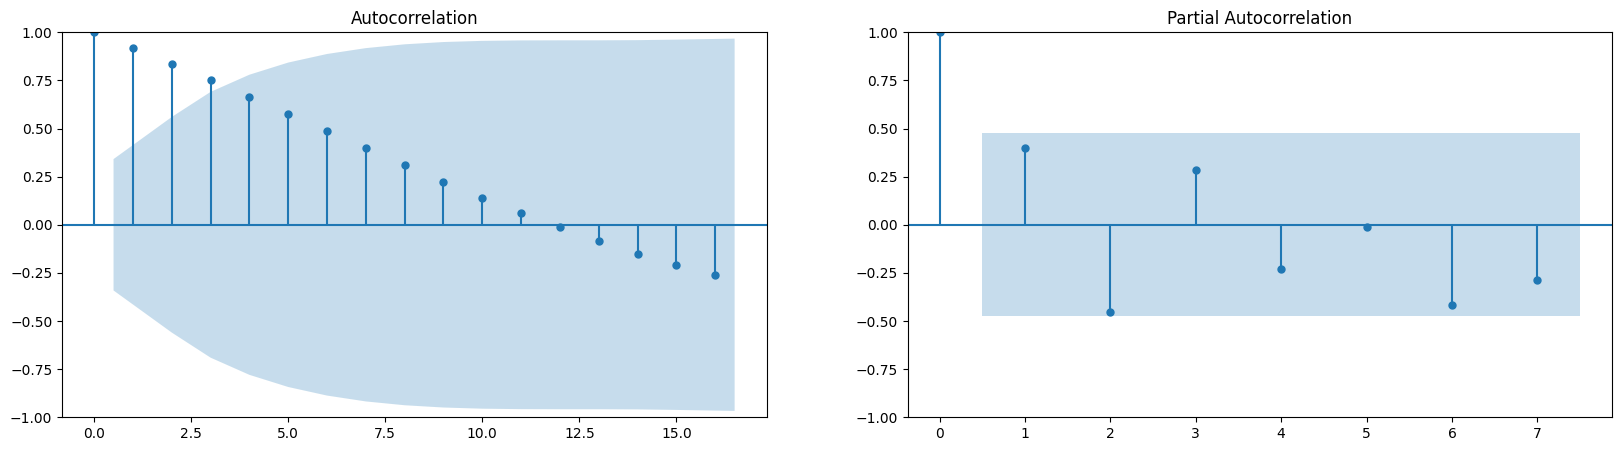

In [ ]:
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

import matplotlib.pyplot as plt


lag_acf = acf(covid_india_confirmed_agg_dataset_minus_ma, nlags = 32)
lag_pacf = pacf(covid_india_confirmed_agg_dataset_minus_ma, nlags = 16)

fig, ax = plt.subplots(1,2,figsize=(20,5))

plot_acf(lag_acf, ax=ax[0])
plot_pacf(lag_pacf,lags=7, ax=ax[1])

plt.show()


In [ ]:
def predict(timeseries,p,d,q):

  from statsmodels.tsa.arima.model import ARIMA


  from sklearn.model_selection import train_test_split

  timeseries.dropna(inplace=True)

  train, test = train_test_split(timeseries, test_size = 0.20, shuffle=False)



  #ARIMA model
  model_arima = ARIMA(train, order=(p,d,q))

  model_arima_fit = model_arima.fit()

  predictions = model_arima_fit.predict(start='2021-02-22', end='2021-05-29')
  predict = (predictions)
  test_set = (test)

  plt.plot(test_set)
  plt.plot(predict, color='red')
  plt.show()

  from pandas import DataFrame

  residual = DataFrame(model_arima_fit.resid)

  residual.plot(kind='kde')

  return test,predictions

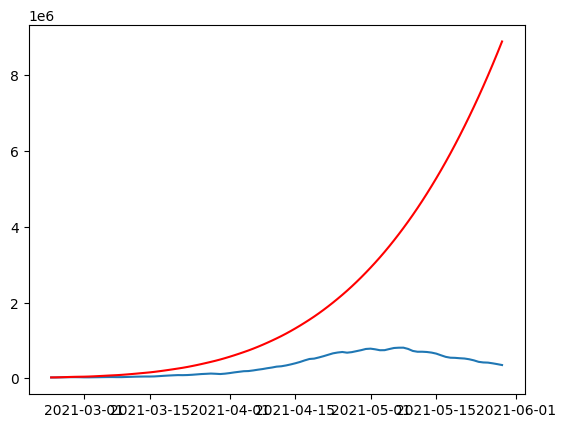

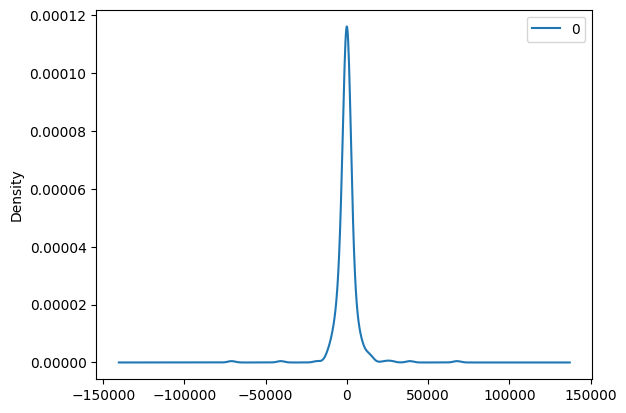

In [ ]:
confirmed_test,confirmed_predict=predict(covid_india_confirmed_agg_dataset_minus_ma,40,5,3)

**MEAN SQUARED ERROR CALCULATION FOR CONFIRMED DATASET**

In [ ]:
from sklearn.metrics import mean_squared_error
error= np.log10(mean_squared_error(confirmed_test,confirmed_predict))
print('Test MSE %.5f' % error)

Test MSE 12.93681


**MODEL BUILDING,TRAINING,TESTING AND PREDICTION USING ARIMA MODEL FOR RECOVERED CASES**

In [ ]:
recovered_case = covid_india_dataset["Recovered"]
covid_india_recovered_agg_dataset = recovered_case.groupby(['ObservationDate']).sum()

**STATIONARITY CHECK **

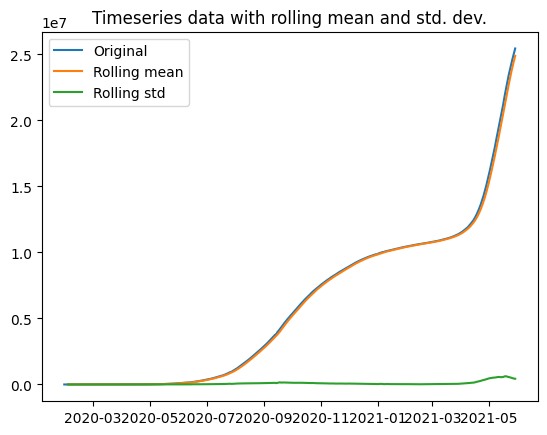

MacKinnon’s approximate p-value    0.998508
dtype: float64


In [ ]:
test_stationarity(covid_india_recovered_agg_dataset)

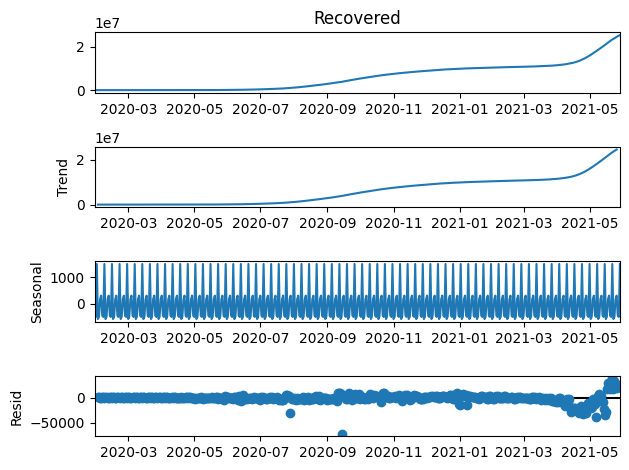

In [ ]:
decomposition=sm.tsa.seasonal_decompose(covid_india_recovered_agg_dataset,model="additive")
fig=decomposition.plot()
plt.show()

**REMOVAL OF TREND COMPONENT**

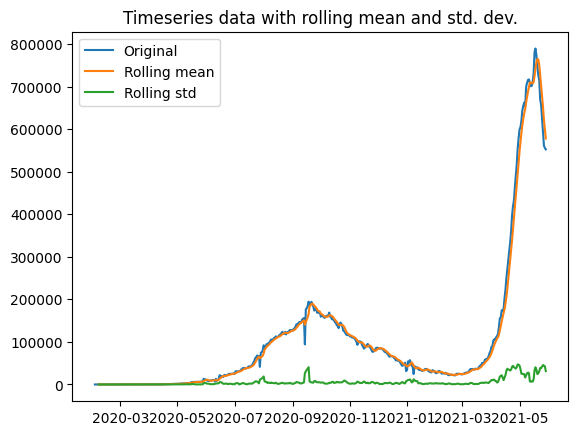

MacKinnon’s approximate p-value    0.000002
dtype: float64


In [ ]:
ma = covid_india_recovered_agg_dataset.rolling(window=5).mean()
covid_india_recovered_agg_dataset_minus_ma=covid_india_recovered_agg_dataset - ma
covid_india_recovered_agg_dataset_minus_ma.dropna(inplace=True)
test_stationarity(covid_india_recovered_agg_dataset_minus_ma)

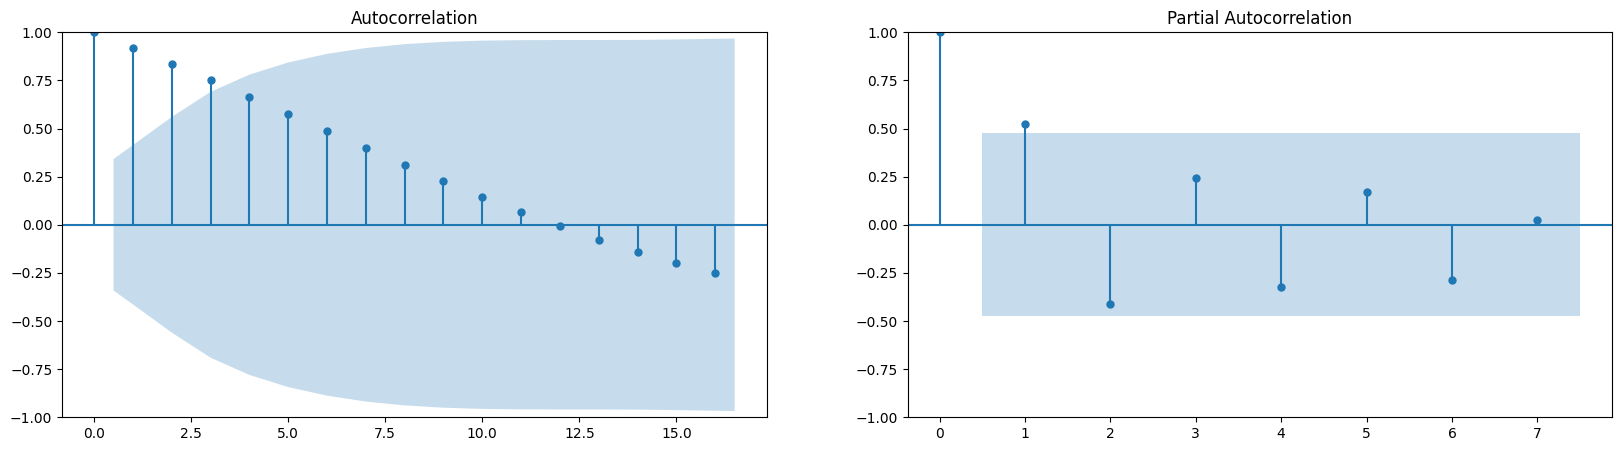

In [ ]:
lag_acf = acf(covid_india_recovered_agg_dataset_minus_ma, nlags = 32)
lag_pacf = pacf(covid_india_recovered_agg_dataset_minus_ma, nlags = 16)

fig, ax = plt.subplots(1,2,figsize=(20,5))

plot_acf(lag_acf, ax=ax[0])
plot_pacf(lag_pacf,lags=7, ax=ax[1])

plt.show()


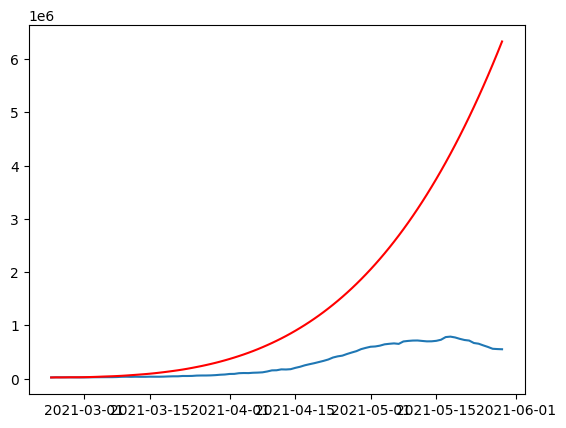

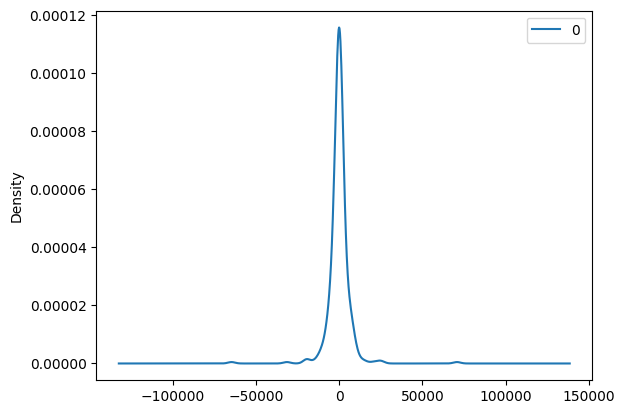

In [ ]:
recovered_test,recovered_predict=predict(covid_india_recovered_agg_dataset_minus_ma,40,5,3)

**MEAN SQUARED ERROR CALCULATION FOR RECOVERED CASES**

In [ ]:
from sklearn.metrics import mean_squared_error
error=np.log10(mean_squared_error(recovered_test,recovered_predict))
print('Test MSE %.5f' % error)

Test MSE 12.58343


**MODEL BUILDING ,TRAINING,TESTING AND PREDICTION USING ARIMA FOR DEATH CASES**

In [ ]:
death_case = covid_india_dataset["Deaths"]
covid_india_death_agg_dataset = death_case.groupby(['ObservationDate']).sum()

**STATIONARITY CHECK**

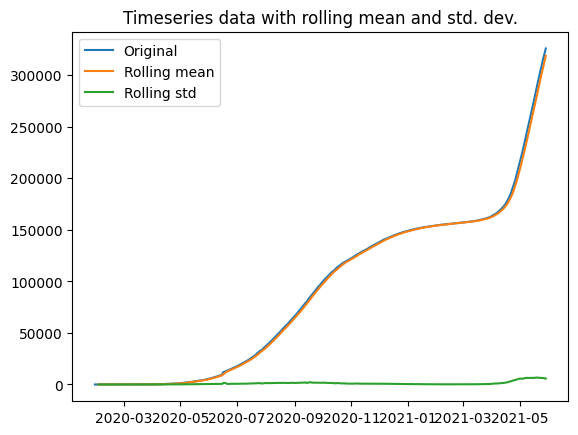

MacKinnon’s approximate p-value    0.995724
dtype: float64


In [ ]:
test_stationarity(covid_india_death_agg_dataset)

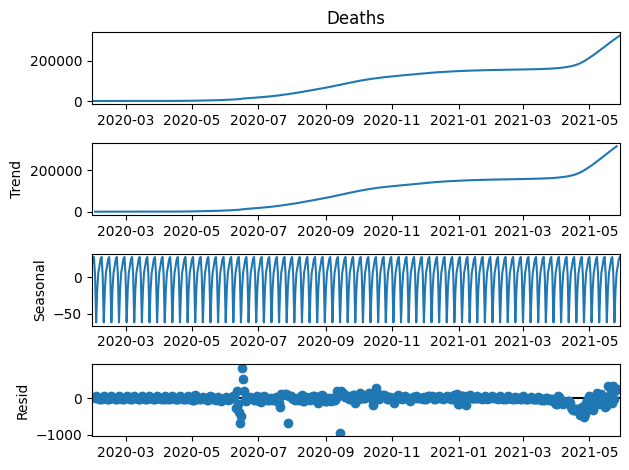

In [ ]:
decomposition=sm.tsa.seasonal_decompose(covid_india_death_agg_dataset,model="additive")
fig=decomposition.plot()
plt.show()

**REMOVAL OF TREND COMPONENT**

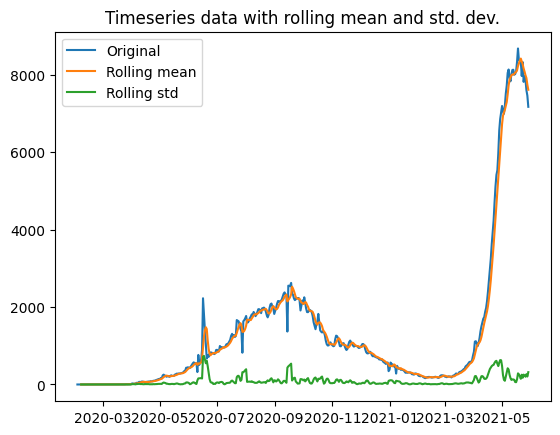

MacKinnon’s approximate p-value    0.008406
dtype: float64


In [ ]:
ma = covid_india_death_agg_dataset.rolling(window=5).mean()
covid_india_death_agg_dataset_minus_ma=covid_india_death_agg_dataset - ma
covid_india_death_agg_dataset_minus_ma.dropna(inplace=True)
test_stationarity(covid_india_death_agg_dataset_minus_ma)

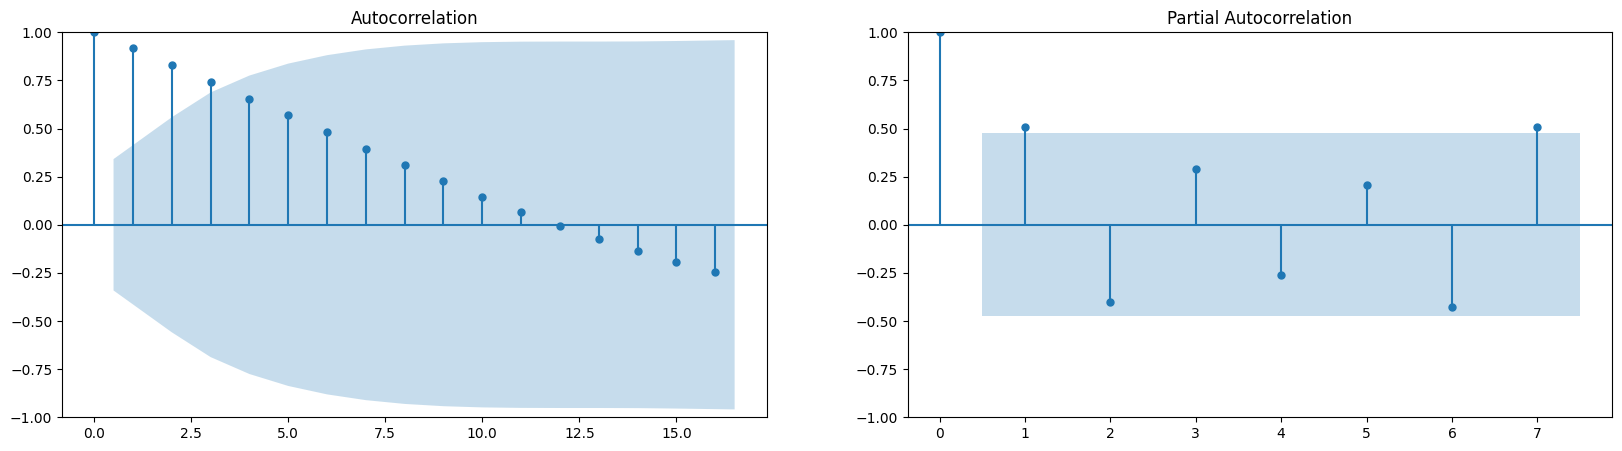

In [ ]:
lag_acf = acf(covid_india_death_agg_dataset_minus_ma, nlags = 32)
lag_pacf = pacf(covid_india_death_agg_dataset_minus_ma, nlags = 16)

fig, ax = plt.subplots(1,2,figsize=(20,5))

plot_acf(lag_acf, ax=ax[0])
plot_pacf(lag_pacf,lags=7, ax=ax[1])

plt.show()


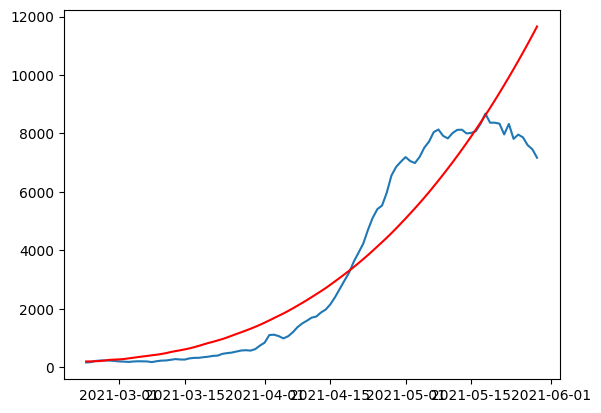

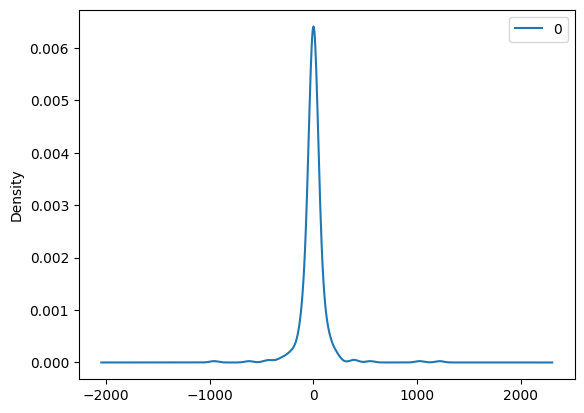

In [ ]:
death_test,death_predict=predict(covid_india_death_agg_dataset_minus_ma,40,5,3)

**MEAN SQUARED ERROR CALCULATION FOR DEATH CASES**

In [ ]:
from sklearn.metrics import mean_squared_error
error= np.log10(mean_squared_error(death_test, death_predict))
print('Test MSE %.5f' % error)

Test MSE 6.15947
